Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

18. Missing Attribute Values: None


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('bank-full.csv',delimiter=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Exploratory Data Analysis (EDA) and Visulization of dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data['job']=data.job.astype('category')
data['marital']=data.marital.astype('category')
data['education']=data.education.astype('category')
data['contact']=data.contact.astype('category')
data['month']=data.month.astype('category')
data['poutcome']=data.poutcome.astype('category')
#bc_df['diagnosis'] = bc_df.diagnosis.astype('category')
data.dtypes

age             int64
job          category
marital      category
education    category
default        object
balance         int64
housing        object
loan           object
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object

In [5]:
#removing NA value in dataset
data=data.dropna()
data.shape

(45211, 17)

In [6]:
data.duplicated().sum()

0

In [7]:
#visulization of categorical data
data1=data[data.y=='yes']
data2=data[data.y=='no']
data1.shape,data2.shape

((5289, 17), (39922, 17))

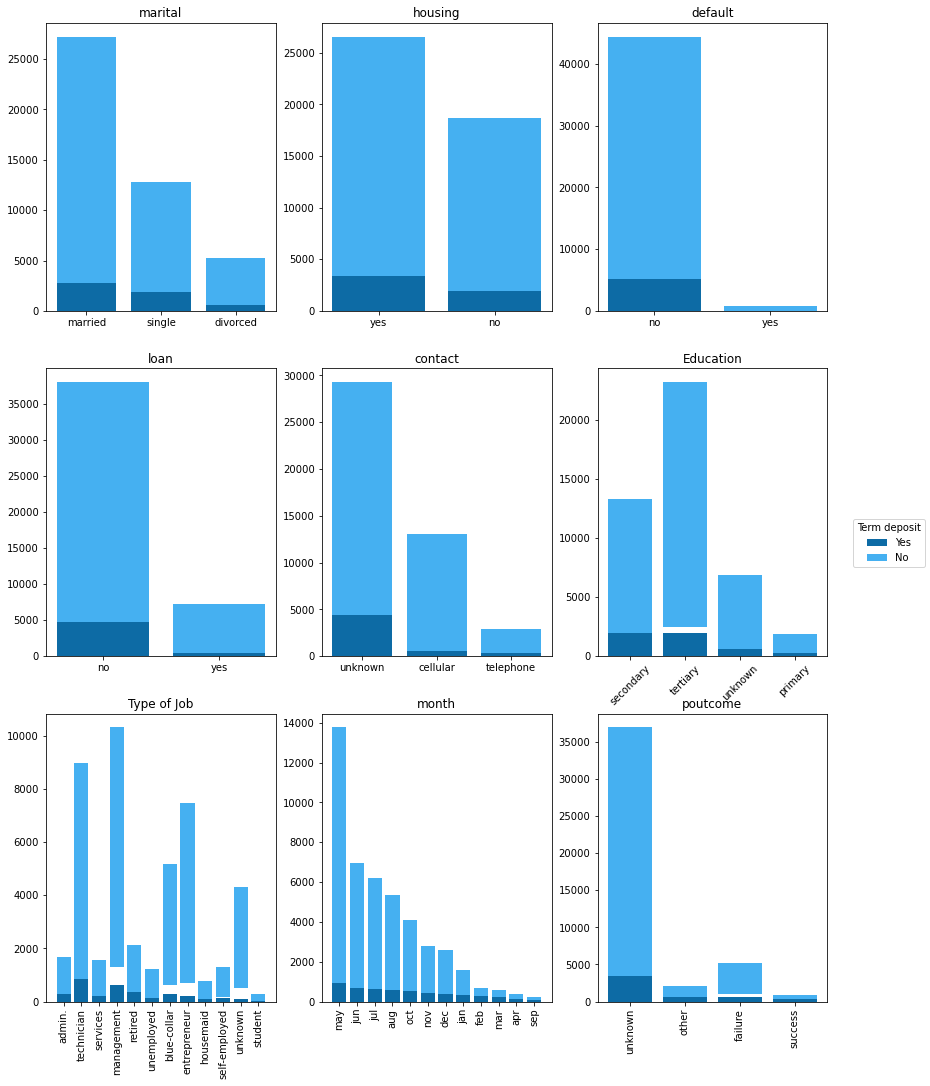

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(14,18))
b1=ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#0d6ba5')
b2=ax[0, 0].bar(data2['marital'].unique(),height = data2['marital'].value_counts()[data2['marital'].value_counts().index],
                bottom = data1['marital'].value_counts(),color = '#45b0f1') 
ax[0, 0].title.set_text('marital')

ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#0d6ba5')
ax[0, 1].bar(data2['housing'].unique(),height = data2['housing'].value_counts()[data2['housing'].value_counts().index],
             bottom = data1['housing'].value_counts(),color = '#45b0f1') 
ax[0, 1].title.set_text('housing')

ax[0, 2].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#0d6ba5')
ax[0, 2].bar(data2['default'].unique(),height = data2['default'].value_counts()[data2['default'].value_counts().index],
             bottom = data1['default'].value_counts(),color = '#45b0f1') 
ax[0, 2].title.set_text('default')

ax[1, 0].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#0d6ba5')
ax[1, 0].bar(data2['loan'].unique(),height = data2['loan'].value_counts()[data2['loan'].value_counts().index],
             bottom = data1['loan'].value_counts(),color = '#45b0f1') 
ax[1, 0].title.set_text('loan')


ax[1, 1].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#0d6ba5')
ax[1, 1].bar(data2['contact'].unique(),height = data2['contact'].value_counts()[data2['contact'].value_counts().index],
             bottom = data1['contact'].value_counts(),color = '#45b0f1') 
ax[1, 1].title.set_text('contact')

ax[1, 2].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#0d6ba5')
ax[1, 2].bar(data2['education'].unique(),height=data2['education'].value_counts()[data2['education'].value_counts().index],
             bottom = data1['education'].value_counts(),color = '#45b0f1') 
ax[1, 2].title.set_text('Education')
ax[1, 2].tick_params(axis='x',rotation=45)

ax[2, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#0d6ba5')
ax[2, 0].bar(data2['job'].unique(),height = data2['job'].value_counts()[data2['job'].value_counts().index],
             bottom = data1['job'].value_counts(),color = '#45b0f1') 
ax[2, 0].title.set_text('Type of Job')
ax[2, 0].tick_params(axis='x',rotation=90)

ax[2, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#0d6ba5')
ax[2, 1].bar(data2['month'].unique(),height = data2['month'].value_counts()[data2['month'].value_counts().index],
             bottom = data1['month'].value_counts(),color = '#45b0f1') 
ax[2, 1].title.set_text('month')
ax[2, 1].tick_params(axis='x',rotation=90)
ax[2, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#0d6ba5')
ax[2, 2].bar(data2['poutcome'].unique(),height = data2['poutcome'].value_counts()[data2['poutcome'].value_counts().index],
             bottom = data1['poutcome'].value_counts(),color = '#45b0f1') 
ax[2, 2].title.set_text('poutcome')
ax[2, 2].tick_params(axis='x',rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

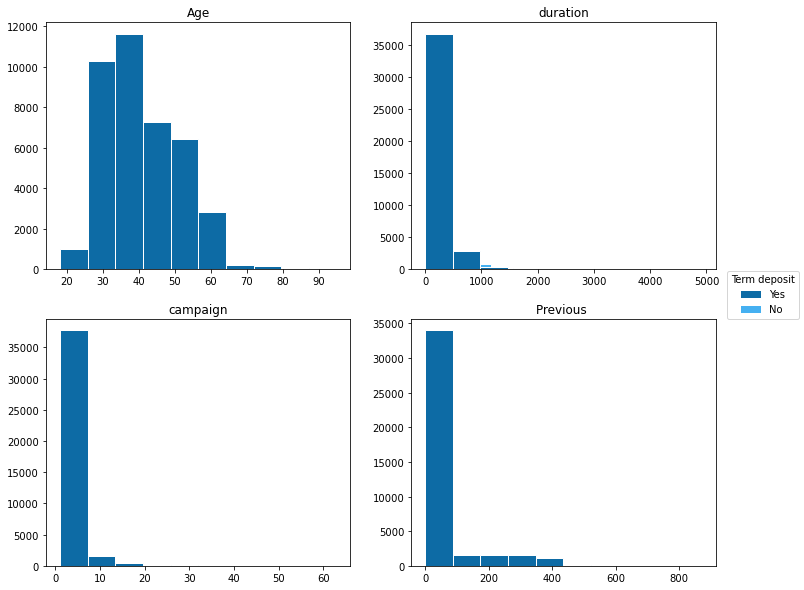

In [9]:
# histogram plot for continous variables
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(data1['age'],color = '#45b0f1', edgecolor='white') 
ax[0, 0].hist(data2['age'],color='#0d6ba5', edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(data1['duration'],color = '#45b0f1',edgecolor='white') 
ax[0, 1].hist(data2['duration'],color='#0d6ba5',edgecolor='white')
ax[0, 1].title.set_text('duration')
ax[1, 0].hist(data1['campaign'],color = '#45b0f1', edgecolor='white') 
ax[1, 0].hist(data2['campaign'],color='#0d6ba5', edgecolor='white')
ax[1, 0].title.set_text('campaign')
ax[1, 1].hist(data1[data1['pdays'] != 999]['pdays'],color = '#45b0f1', edgecolor='white') 
ax[1, 1].hist(data2[data2['pdays'] != 999]['pdays'],color='#0d6ba5', edgecolor='white')
ax[1, 1].title.set_text('pdays ')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

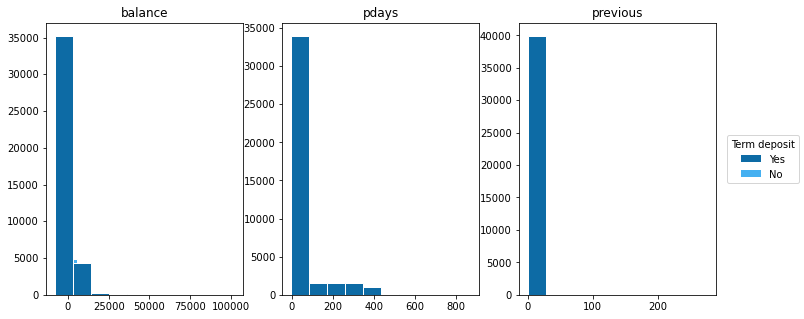

In [10]:
fig, ax = plt.subplots(1, 3,squeeze=False, figsize=(12,5))

ax[0, 0].hist(data1['balance'],color = '#45b0f1', edgecolor='white') 
ax[0, 0].hist(data2['balance'],color='#0d6ba5', edgecolor='white')
ax[0, 0].title.set_text('balance')
ax[0, 1].hist(data1['pdays'],color = '#45b0f1',edgecolor='white') 
ax[0, 1].hist(data2['pdays'],color='#0d6ba5', edgecolor='white')
ax[0, 1].title.set_text('pdays')
ax[0, 2].hist(data1['previous'],color = '#45b0f1', edgecolor='white') 
ax[0, 2].hist(data2['previous'],color='#0d6ba5',edgecolor='white')
ax[0, 2].title.set_text('previous')

plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

In [11]:
new_data=data.copy()
new_data=new_data.drop(['duration','contact','marital','month','day'],axis=1)
new_data.head()

,age,job,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,1,-1,0,unknown,no
1,44,technician,secondary,no,29,yes,no,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,yes,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,yes,no,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,no,1,-1,0,unknown,no


## One-Hot Encoding for categorical variables

In [12]:
new_data=pd.get_dummies(new_data,columns=['job','education','poutcome'],drop_first=False)
new_data.head()

,age,default,balance,housing,loan,campaign,pdays,previous,y,job_admin.,...,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,1,-1,0,no,0,...,0,0,0,0,1,0,0,0,0,1
1,44,no,29,yes,no,1,-1,0,no,0,...,0,0,0,1,0,0,0,0,0,1
2,33,no,2,yes,yes,1,-1,0,no,0,...,0,0,0,1,0,0,0,0,0,1
3,47,no,1506,yes,no,1,-1,0,no,0,...,0,0,0,0,0,1,0,0,0,1
4,33,no,1,no,no,1,-1,0,no,0,...,0,1,0,0,0,1,0,0,0,1


In [13]:
# Custom Binary Encoding of Binary o/p variables 
new_data['default'] = np.where(new_data['default'].str.contains("yes"), 1, 0)
new_data['housing'] = np.where(new_data['housing'].str.contains("yes"), 1, 0)
new_data['loan'] = np.where(new_data['loan'].str.contains("yes"), 1, 0)
new_data['y'] = np.where(new_data['y'].str.contains("yes"), 1, 0)
new_data

,age,default,balance,housing,loan,campaign,pdays,previous,y,job_admin.,...,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,1,-1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,3,-1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,0,2,-1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,5,184,3,1,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,4,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


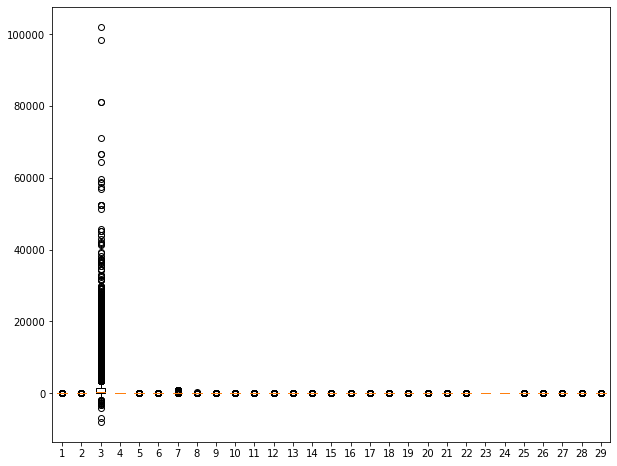

In [14]:
# checking from outliers
plt.figure(figsize=(10,8))
plt.boxplot(new_data)
plt.show()

C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

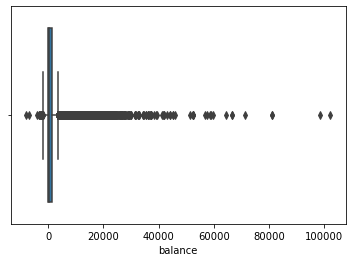

In [15]:
sns.boxplot(new_data['balance'])

In [16]:
#removing outlier
def outlierDetect(col):
    Q1 = np.percentile(col, 25, interpolation = 'midpoint')  
    Q3 = np.percentile(col, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    return low_lim,up_lim

In [17]:
for i in range(12):
    lower,uper=outlierDetect(new_data['balance'])
    new_data=new_data[(new_data['balance']<uper )&(new_data['balance']>lower)]
    print(new_data.shape)

(40480, 29)
(37931, 29)
(36484, 29)
(35589, 29)
(35093, 29)
(34827, 29)
(34637, 29)
(34540, 29)
(34491, 29)
(34463, 29)
(34447, 29)
(34432, 29)


In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 1 to 45209
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  34432 non-null  int64
 1   default              34432 non-null  int32
 2   balance              34432 non-null  int64
 3   housing              34432 non-null  int32
 4   loan                 34432 non-null  int32
 5   campaign             34432 non-null  int64
 6   pdays                34432 non-null  int64
 7   previous             34432 non-null  int64
 8   y                    34432 non-null  int32
 9   job_admin.           34432 non-null  uint8
 10  job_blue-collar      34432 non-null  uint8
 11  job_entrepreneur     34432 non-null  uint8
 12  job_housemaid        34432 non-null  uint8
 13  job_management       34432 non-null  uint8
 14  job_retired          34432 non-null  uint8
 15  job_self-employed    34432 non-null  uint8
 16  job_services         3

In [19]:
# Dividing our data into input and output variables 
X = new_data.drop(['y'],1)
y = new_data['y']

C:\Users\hmaca\AppData\Local\Temp/ipykernel_8876/3991998035.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = new_data.drop(['y'],1)


In [20]:
y.value_counts()

0    30879
1     3553
Name: y, dtype: int64

In [21]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [22]:
#Logistic regression and fit the model
clf=LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Training Accuracy

In [23]:
#Predict for X dataset
y_pred_train=clf.predict(X_train)
y_pred_train_df = pd.DataFrame({'actual': y_train,'predicted_prob': y_pred_train})
y_pred_train_df

,actual,predicted_prob
31169,0,0
43313,1,0
32469,0,0
21729,0,0
24007,0,0
...,...,...
26649,0,0
41571,1,0
39048,0,0
27581,0,0


## Testing Accuracy

In [24]:
y_pred_test=clf.predict(X_test)
y_pred_test_df = pd.DataFrame({'actual': y_test,'predicted_prob': y_pred_test})
y_pred_test_df

,actual,predicted_prob
26159,0,0
13608,0,0
32760,0,0
30815,0,0
42113,0,1
...,...,...
40567,0,0
4260,0,0
35731,0,0
10720,0,0


## Checking for overfitting and underfitting

In [25]:
print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred_train),5)}')
print(f'Testing-set accuracy score: {round(accuracy_score(y_test, y_pred_test),5)}')

Training-set accuracy score: 0.90572
Testing-set accuracy score: 0.90187


#### Both have quite same accuracy so their is no overfitting and underfitting

## Confusion Matrix

In [26]:
cm=confusion_matrix(y_test,y_pred_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10115    58]
 [ 1057   133]]


<AxesSubplot:>

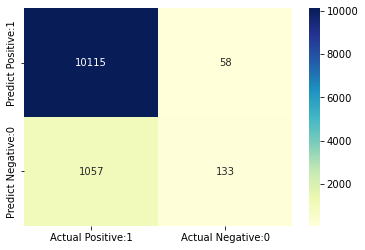

In [27]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


## Classification report

In [28]:
# print classification accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f'Classification accuracy : {round(classification_accuracy,4)}')


Classification accuracy : 0.9019


In [29]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(f'Classification error : {round(classification_error,4)}')


Classification error : 0.0981


## Precision

In [30]:
# print precision score

precision = TP / float(TP + FP)


print(f'Precision : {round(precision,4)}')

Precision : 0.9943


## Recall or True Positive Rate

In [31]:
recall = TP / float(TP + FN)

print(f'Recall or Sensitivity : {round(recall,4)}')

Recall or Sensitivity : 0.9054


## Adjusting the threshold level

In [32]:
# print the predicted probabilities of two classes- 0 and 1

y_pred_prob = clf.predict_proba(X_test)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of client Not subscribed a term deposit(0)',
                                                         'Prob of client subscribed a term deposit (1)'])
y_pred_prob_df

,Prob of client Not subscribed a term deposit(0),Prob of client subscribed a term deposit (1)
0,0.953817,0.046183
1,0.832629,0.167371
2,0.935628,0.064372
3,0.957079,0.042921
4,0.340565,0.659435
...,...,...
11358,0.871593,0.128407
11359,0.947781,0.052219
11360,0.950372,0.049628
11361,0.945735,0.054265


In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10173
           1       0.70      0.11      0.19      1190

    accuracy                           0.90     11363
   macro avg       0.80      0.55      0.57     11363
weighted avg       0.88      0.90      0.87     11363



### Try different threshold 


In [34]:
pred_threshold = pd.DataFrame( columns = ['Threshold',
                               'Correct_Predictions',
                               'FP',
                               'FN',
                               'Precision',
                               'Recall'],index=None) 
pred_threshold

,Threshold,Correct_Predictions,FP,FN,Precision,Recall


In [35]:

from sklearn.preprocessing import binarize

for i in range(1,10):
    
    cm1=0
    
    y_pred1 = clf.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    cm1 = confusion_matrix(y_test, y_pred2)

    TP = cm1[0,0]
    TN = cm1[1,1]
    FP = cm1[0,1]
    FN = cm1[1,0]
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
   
    pred_threshold = pred_threshold.append({'Threshold':i,
                               'Correct_Predictions':TP+FP,
                               'FP':FP,
                               'FN':FN,
                               'Precision':TP/(TP+FP),
                               'Recall':TP/(TP+FN)}, ignore_index=True)

C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\hmaca\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.4 as keyword args. From

In [36]:
pred_threshold

,Threshold,Correct_Predictions,FP,FN,Precision,Recall
0,1.0,10173.0,3494.0,473.0,0.656542,0.933865
1,2.0,10173.0,507.0,858.0,0.950162,0.918472
2,3.0,10173.0,166.0,969.0,0.983682,0.911716
3,4.0,10173.0,76.0,1027.0,0.992529,0.907677
4,5.0,10173.0,58.0,1057.0,0.994299,0.905388
5,6.0,10173.0,35.0,1126.0,0.996560,0.900036
6,7.0,10173.0,5.0,1181.0,0.999509,0.895938
7,8.0,10173.0,1.0,1190.0,0.999902,0.895265
8,9.0,10173.0,1.0,1190.0,0.999902,0.895265


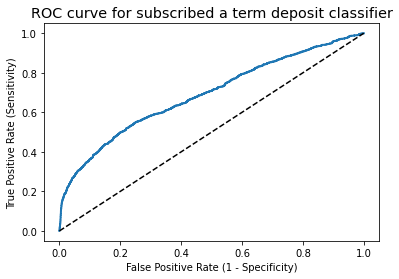

In [37]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test, y_pred1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for subscribed a term deposit classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred1)
auc

0.6892844545662559

### Conclusions
The logistic regression model accuracy score is 0.6892. So, the model does a very good job in predicting Whether the client has subscribed a term deposit or not 

The model shows no signs of overfitting.

ROC AUC of our model is reasonably high. So, we can conclude that our classifier does a good job in predicting Whether the client has subscribed a term deposit or not 